표준화 라이브러리 소개

# Gymnasium 설치하기

Gymnasium은 다양한 강화학습 환경을 제공하는 표준화된 라이브러리입니다. 사용자는 에이전트가 상호작용할 수 있는 일관된 구조의 환경을 쉽게 만들고 불러올 수 있으며, 상태, 행동, 보상으로 이루어진 강화학습 실험을 빠르게 구성할 수 있습니다. 인터넷에서 흔히 볼 수 있는 대부분의 강화학습 강의들은 빠르게 결과를 볼 수 있도록 Gymnasium 라이브러리를 기반으로 수업을 진행합니다. 우리가 직접 구현하였던 Mountain Car 문제 등도 모두 여기에서 시각화할 수 있어요. 당연히 이런 라이브러리 사용 경험도 필요하니 이번에 간단히 해 봅시다. 

## 1. 패키지 설치
제공되는 패키지를 통해 실행해 봅니다. 설치해야 할 패키지 목록입니다.
  - pip install stable-baselines3[extra]
  - pip install gymnasium[atari,accept-rom-license]
  - pip install moviepy

## 2. 설치

In [2]:
import gymnasium as gym
gym.pprint_registry()

===== classic_control =====
Acrobot-v1             CartPole-v0            CartPole-v1
MountainCar-v0         MountainCarContinuous-v0 Pendulum-v1
===== phys2d =====
phys2d/CartPole-v0     phys2d/CartPole-v1     phys2d/Pendulum-v0
===== box2d =====
BipedalWalker-v3       BipedalWalkerHardcore-v3 CarRacing-v3
LunarLander-v3         LunarLanderContinuous-v3
===== toy_text =====
Blackjack-v1           CliffWalking-v1        CliffWalkingSlippery-v1
FrozenLake-v1          FrozenLake8x8-v1       Taxi-v3
===== tabular =====
tabular/Blackjack-v0   tabular/CliffWalking-v0
===== None =====
Ant-v2                 Ant-v3                 GymV21Environment-v0
GymV26Environment-v0   HalfCheetah-v2         HalfCheetah-v3
Hopper-v2              Hopper-v3              Humanoid-v2
Humanoid-v3            HumanoidStandup-v2     InvertedDoublePendulum-v2
InvertedPendulum-v2    Pusher-v2              Reacher-v2
Swimmer-v2             Swimmer-v3             Walker2d-v2
Walker2d-v3
===== mujoco =====
Ant-v4    

In [3]:
env = gym.make("MountainCar-v0", render_mode="rgb_array")
obs, info = env.reset()

In [5]:
frames = []
for t in range(2000):
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    frame = env.render()
    frames.append(frame)
    if terminated or truncated:
        break

env.close()

In [6]:
import imageio
video_path = "mountaincar_random.mp4"
imageio.mimsave(video_path, frames, fps=30)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (600, 400) to (608, 400) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


In [7]:
from IPython.display import Video
Video("mountaincar_random.mp4", embed=True)

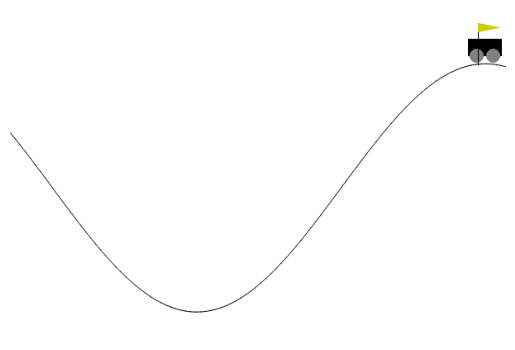

In [22]:
import gymnasium as gym
import numpy as np
from IPython.display import HTML
from matplotlib import animation
import matplotlib.pyplot as plt

env = gym.make("MountainCar-v0", render_mode="rgb_array")
obs, _ = env.reset()
frames = []

for _ in range(500):
    position, velocity = obs
    action = 0 if velocity < 0 else 2   # 성공 정책
    obs, reward, terminated, truncated, info = env.step(action)
    frames.append(env.render())
    if terminated or truncated:
        break

env.close()

def display_video(frames, fps=30):
    fig = plt.figure()
    plt.axis("off")
    im = plt.imshow(frames[0])

    def animate(i):
        im.set_array(frames[i])
        return [im]

    ani = animation.FuncAnimation(fig, animate, frames=len(frames), interval=1000/fps)
    return HTML(ani.to_jshtml())

display_video(frames)